# Credit Fraud Classificaiton Tutorial

### 1. Basic data manipulation with pandas
### 2. Creating a classificaiton model using tensorflow and keras
### 3. Addresssing class imbalance using class weights
### 4. Evaluating the model with the f1 score

## Import Packages

In [1]:
import numpy as np #linear algebra and array manipulation
import pandas as pd #DataFrame, data manipulation
import tensorflow as tf #Deep Learning Framework
import tensorflow.keras as keras #built on top of tensorflow
import tensorflow.keras.layers as tfl #Neural Network layers

# Data Processing

## Load Data
In the right bar there is a Input section containing all of the data needed. Expand the input and copy the file path so you can load in the data with pandas.

In [2]:
#copy file path
input_file_path = '/kaggle/input/creditcardfraud/creditcard.csv'

#use read_csv command to load the data into a DataFrame
credit_data = pd.read_csv(input_file_path)

In a new cell you can see the data in the dataframe just by putting it on the last line.

In [3]:
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## DataFrames Operations
DataFrames have basic properties that can be useful to know about. One is the dataframes shape, as well basic info about its columns, and a statistical summary of its columns. You don't need to memorize these just know they exist and look up anything you don't know. 

In [4]:
credit_data.shape

(284807, 31)

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Split data into X and y

Using .iloc treates the dataframe like an array, putting : includes the entire dimension. so .iloc[:,:] includes the entire dataframe.

In [7]:
X = credit_data.iloc[:,:30]
y = credit_data.iloc[:,30]

# Create Model

## Make a Model Function
Making a function makes it easier to tune the model.

To create a model we can use the keras Sequential API. 
1. Create the sequential model and add layers. First add an Input() layer then in this case use Dense() layers which are normal neural network layers. For Dense layers you can specify the number of units and the activation function.
2. Compile the model. Here you specify your loss function (mean square error, 'mse') and the optimizer. Use 'adam' which is gradient descent algorithim that it tweaked to improve convergence, don't worry about the details for now. You can also specify metrics such as mean absulote error 'mae'.

In [8]:
def create_model():
    
    model = keras.Sequential([
        tfl.Input(shape = (30,)),
        tfl.Dense(units = 512, activation = 'sigmoid'),
        tfl.Dense(units = 512, activation = 'sigmoid'),
        tfl.Dense(units = 1, activation = 'sigmoid')
    ])
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

## View Model Summary
The number of parameters is usually a good indicator of your model's complexity and how long it will take to train. The number of parameters is important but it's usually better initially to pay attention to the general architecture (like choice of activation function). 

In [9]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 279,041
Trainable params: 279,041
Non-trainable params: 0
_________________________________________________________________


# Iteratively Train Model

## Fitting the Model
model.fit trains the model by going through the entire dataset and preforming gradient descent. You can specify the epoch number, the number of loops through the training data.

In [10]:
history = model.fit(X,y, epochs = 1)

8901/8901 [==============================] - 48s 5ms/step - loss: 0.0134 - accuracy: 0.9982


## Evaluating The Model
The model looks really accurate, lets see how often it can recognize fraud.

In order to only use fraudulent cases we need to see where in the dataframe (what indexes) the Class is 1. The list of that tells you whether the index meets some condition is called a mask. We can put the mask on the dataframe to get the dataframe of only fraudulent cases.

In [11]:
fraud_mask = credit_data['Class'] == 1 #Set a condition, series of boolean values
fraud_data = credit_data[fraud_mask] #Get only fraud cases

#Split into X and y
X_fraud = fraud_data.iloc[:,:30] 
y_fraud = fraud_data.iloc[:,30]

Use model.evaluate to get the loss and other metrics (accuracy) on the data.

In [12]:
model.evaluate(X_fraud,y_fraud)

16/16 [==============================] - 0s 2ms/step - loss: 7.2602 - accuracy: 0.0000e+00


[7.2602386474609375, 0.0]

0 percent accuracy whats going on, lets look at the model's predictions.

In [13]:
model.predict(X_fraud[:10])

1/1 [==============================] - 0s 112ms/step


array([[0.00070294],
       [0.00070288],
       [0.00070294],
       [0.00070294],
       [0.00070294],
       [0.00070294],
       [0.00070294],
       [0.00070294],
       [0.00070294],
       [0.00070294]], dtype=float32)

It looks like the model is only guessing that the case is not fraudulent, so the model only seems like its accurate because there is a major class imbalance.

## Addressing Class Imbalance
Class Weights are a common method of addressing imbalance. What it does is weight the under represented class higher in the loss function.

In [14]:
class_totals = [len(y)-len(y_fraud),len(y_fraud)]
class_weight = {i:len(y)/(2*total) for i,total in enumerate(class_totals)}

It seems like our model isn't complex enough to learn how to detect fradulent behavior. Lets add more layers and try using a better activation function. We will also use the AUC metric which accounts for class imbalance. AUC will be between 0 and 1, the higher the better. (In actual code you wouldn't recreate the model function just edit the original)

In [15]:
AUC = keras.metrics.AUC(curve = 'PR') # get the auc metric, don't worry about what it is only its meaning for now

def create_model():
    
    model = keras.Sequential([
        tfl.Input(shape = (30,)),
        tfl.Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'), #When using relu specify the kernel initializer to be
        tfl.Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'), #'he_uniform'
        tfl.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy',AUC]) #Use better metric AUC 
    
    return model

In [16]:
model = create_model() #creating the model again
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1984      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X,y,epochs = 10, class_weight = class_weight) #training with new model

Epoch 1/10
8901/8901 [==============================] - 21s 2ms/step - loss: 1097.0459 - accuracy: 0.5455 - auc: 0.0018
Epoch 2/10
8901/8901 [==============================] - 20s 2ms/step - loss: 132.2289 - accuracy: 0.5840 - auc: 0.0020
Epoch 3/10
8901/8901 [==============================] - 20s 2ms/step - loss: 15.8924 - accuracy: 0.3939 - auc: 0.0020
Epoch 4/10
8901/8901 [==============================] - 20s 2ms/step - loss: 3.1580 - accuracy: 0.0454 - auc: 0.0021
Epoch 5/10
8901/8901 [==============================] - 20s 2ms/step - loss: 1.9548 - accuracy: 0.2909 - auc: 0.0020
Epoch 6/10
8901/8901 [==============================] - 20s 2ms/step - loss: 4.1220 - accuracy: 0.3551 - auc: 0.0026
Epoch 7/10
8901/8901 [==============================] - 20s 2ms/step - loss: 1.1635 - accuracy: 0.0711 - auc: 0.0017
Epoch 8/10
8901/8901 [==============================] - 21s 2ms/step - loss: 1.6208 - accuracy: 0.9129 - auc: 0.0017
Epoch 9/10
8901/8901 [==============================] - 20

It looks like the loss and accuracy are jumping all over the place. This corresponds the having a learning rate that's too high unable to converge.

## Update Model Function and Use Step Decay

In [18]:
def create_model(learning_rate):
    
    model = keras.Sequential([
        tfl.Input(shape = (30,)),
        tfl.Dense(64, activation = 'leaky_relu', kernel_initializer = 'he_uniform'), 
        tfl.Dense(128, activation = 'leaky_relu', kernel_initializer = 'he_uniform'), 
        tfl.Dense(256, activation = 'leaky_relu', kernel_initializer = 'he_uniform'), # Use more layers and units
        tfl.Dense(128, activation = 'leaky_relu', kernel_initializer = 'he_uniform'),
        tfl.Dense(64, activation = 'leaky_relu', kernel_initializer = 'he_uniform'),
        tfl.Dense(1, activation = 'sigmoid')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate) # Specify learning rate by creating adam optimizer object
    
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy',AUC])
    
    return model

Lets use a more complex model and also incorporate step decay in order to decrease the learning rate when we get to more sensitive regions.

In [19]:
step_decay = keras.callbacks.LearningRateScheduler(
    lambda epoch: 10**(- int(epoch/10) - 3)
)
model = create_model(1e-3)
model.fit(X,y,epochs = 40, callbacks = [step_decay])

Epoch 1/40
8901/8901 [==============================] - 30s 3ms/step - loss: 59.9129 - accuracy: 0.9951 - auc: 0.0017 - lr: 0.0010
Epoch 2/40
8901/8901 [==============================] - 29s 3ms/step - loss: 15.3859 - accuracy: 0.9957 - auc: 0.0021 - lr: 0.0010
Epoch 3/40
8901/8901 [==============================] - 28s 3ms/step - loss: 13.1150 - accuracy: 0.9962 - auc: 0.0032 - lr: 0.0010
Epoch 4/40
8901/8901 [==============================] - 28s 3ms/step - loss: 13.1418 - accuracy: 0.9957 - auc: 0.0024 - lr: 0.0010
Epoch 5/40
8901/8901 [==============================] - 28s 3ms/step - loss: 4.9311 - accuracy: 0.9965 - auc: 0.0051 - lr: 0.0010
Epoch 6/40
8901/8901 [==============================] - 28s 3ms/step - loss: 7.6499 - accuracy: 0.9967 - auc: 0.0240 - lr: 0.0010
Epoch 7/40
8901/8901 [==============================] - 28s 3ms/step - loss: 3.7765 - accuracy: 0.9963 - auc: 0.0095 - lr: 0.0010
Epoch 8/40
8901/8901 [==============================] - 28s 3ms/step - loss: 20.3187 -

It seems like the model accuractely understands how to classify cases as fraudulent or non fraudulent. Let's test how good our final model is.

# Model Evaluation

## Precision and Recall

So far we know that accuracy isn't always reliable because of major class imbalance because the model can just guess for the majority class. Instead using AUC helps see how well our model can actaully classify both classes reliably. When we tested the model on only fraudulent cases we saw that the model did extremely poorly, instead of looking at the models accuracy on the entire dataset we can instead compute the accuracy on positive cases which is called recall. However the recall can also be unreliable if our model always guesses that the case is fraudulent, therefore we can look at only the cases where the model predicts a positive case and compute the accuracy called precision. Both precision and recall are valuable, in medicine recall is usually valued more because even if precision is a bit lower its urgent to identify most positive cases, however if we want shoot an airplane down depending on if its from the correct military you would want to consider precision more.

$$
    recall = \frac{T_p}{T_p + F_n}
$$
<br>
$$
    precision = \frac{T_p}{T_p + F_p}
$$
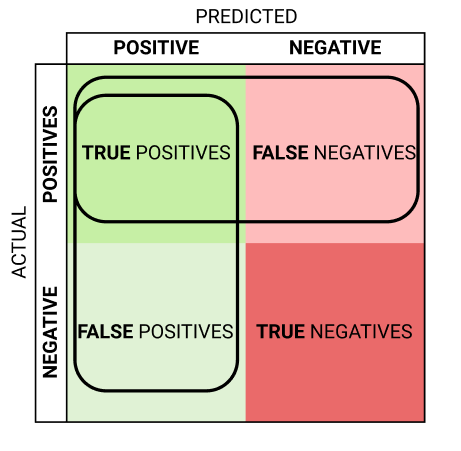

## AUC

Since our model outputs probabilities instead of 1s and 0s we need to set a threshold value meaning that our accuracy, precision, and recall can change depending on the choice of thershold. A choice of 0.5 for the threshold isn't always the best one because precision and recall can vary according to the threshold. In order to understand the general effectiveness of the model in terms of the precision and recall we can plot their relationship across varying thersholds from 0 to 1. A generally high precision and recall means the curve will be oriented towards the top right, we can measure this by getting the area underneath the curve which is called the pr auc which stands for precision recall area under the curve. 

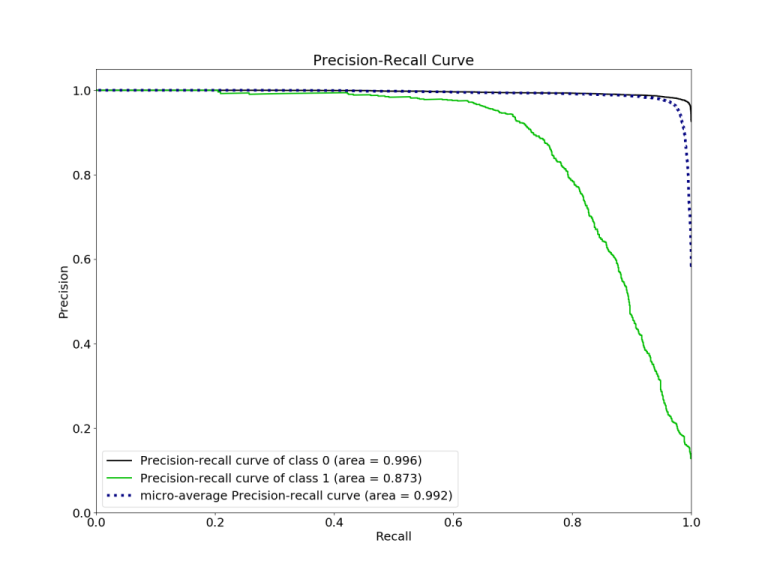

## F Score

Now that we have the trained model we don't need to use AUC anymore because we can just determine the best threshold, but it's difficult to determine what the best thershold is based viewing precision and recall individually therefore we can combine them into a metric called the F beta score. The F beta score works like AUC and accuracy in the sense that values are constrained between 0 and 1 and higher is better. Gives precision and recall by choosing a threshold the F beta score returns a value so to determine the best threshold we just need to find the maximum. This metric also requires a choice of beta, higher beta corresponds with higher importance to recall and lower corresponds with more importance on precision with a default value of 1 for equal importance. <br>
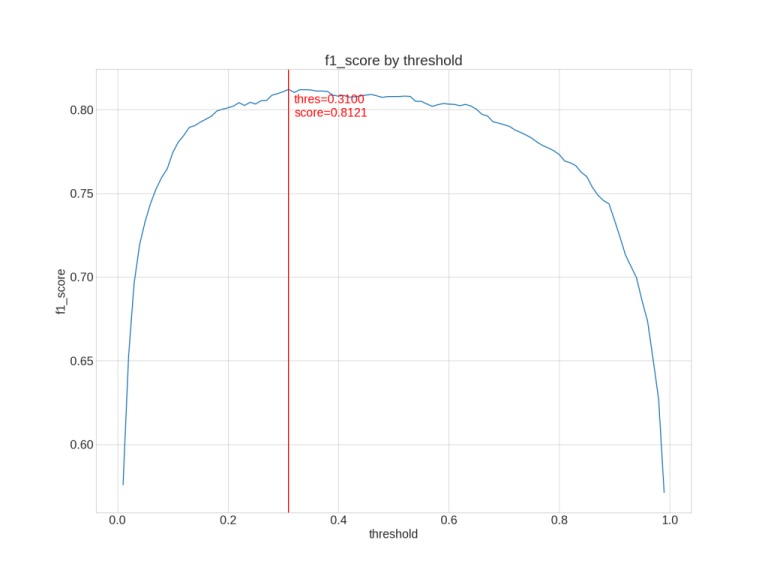

## Finding the Best Threshold

In [20]:
from sklearn.metrics import fbeta_score
best_threshold = -1
best_F1 = 0

for threshold in np.linspace(0,1,101):
    
    #batch_size = len(y) means it'll do the prediciton on the entire dataset at once, verbose = 0 means no progress bar
    y_pred = model.predict(X, batch_size = len(y), verbose = 0) 
    y_pred = y_pred > threshold #True corresponds with 1 and false corresponds with 0
    
    F1 = fbeta_score(y, y_pred, beta = 1)
    
    if best_F1 < F1:
        best_threshold = threshold
        best_F1 = F1
        
print('best threshold:', best_threshold, 'best F1:', best_F1)

best threshold: 0.5700000000000001 best F1: 0.8294314381270903


# Summary

1. basic data manipulation with pandas .iloc[row index, column index]
2. creating a classificaiton model
    1. using a better activation function relu with he uniform initialization
    2. adding more layers and units to increase complexity
    3. using step decay during training
3. addresssing class imbalance
    1. using class weights to weight positive and negative cases equally in the loss function
    2. using AUC metric to get a reliable metric for performance
4. evaluating the model
    1. using the F1 score to find the best threshold and get the best metric for final model performance